In [1]:
!pip install numpy
!pip install --user matplotlib
!pip install --user scikit-learn

In [4]:
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from numpy import linalg as LA

#producing fault distribution data (array)
def data_production(class_number,data_number) :
    import numpy as np
    import random
    from matplotlib import pyplot as plt
    r1 = [[40,60],[30,70],[20,80]] #input number is 3
    r2 = [[40,60],[34,66],[27,73],[20,80]] #input number is 4 [26,74]
    r3 = [[40,60],[35,65],[30,70],[25,75],[20,80]] #input number is 5
    r4 = [[40,60]]
    r5 = [[30,70]]
    r6 = [[20,80]]
    
    r = [r1,r2,r3,r4,r5,r6]
    r = r[class_number]
    group = len(r) 
    data = data_number;
    w = []; l = [];
    for i in range(0,group):
        for j in range(0,data):
            intra = np.zeros((100,100))
            while np.sum(intra.reshape(1,10000)) < random.randrange(25,101) :            
                intra[random.randrange(r[i][0],r[i][1]),random.randrange(r[i][0],r[i][1])] = 1
            w.append(intra); l.append(i)
    w = np.array(w)
    X = w.reshape(data*group,-1); y = np.array(l)
  
    return X

def show_image(X,number,cmap,axis):
    from matplotlib import pyplot as plt
    plt.figure()
    ax = plt.gca()
    plt.imshow(X[number,:].reshape(100,100),cmap=cmap, vmin = -1.5, vmax = 1.5, interpolation='nearest')
    plt.colorbar()
    """ax.set_xticklabels('')
    ax.set_yticklabels('')"""

    ax.axis(axis)

def image_adjust(X,number,cmap,min,max):
    plt.figure()
    ax = plt.gca()
    plt.xlim(min+0.5,max-0.5)
    plt.ylim(min+0.5,max-0.5)
    plt.imshow(X[number,:].reshape(100,100),cmap=cmap, vmin = -1.5, vmax = 1.5, interpolation='nearest')
    plt.colorbar()

#calculation of cumulative explained eigenvalue
def cumulative_eigenvalue(X,Nd,line,legend):
    M = np.mean(X.T, axis=1)
    C = X-M
    co = np.cov(C.T)
    values, vectors = LA.eig(co)
    values = np.real(np.sort(values)[::-1])
    ratio=[]
    for i in range(0,len(values)):
        ratio.append(values[i]/sum(values))
    plt.plot(np.cumsum(ratio)[:3000],line,label=legend)

# Fig. 4a

Text(0, 0.5, 'explained variance')

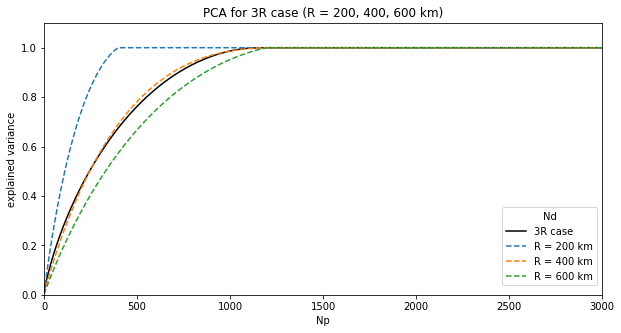

In [5]:
#number of data
Nd = 400
#the number of principal components
Np = 1200
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
plt.xlim(0,3000)
plt.ylim(0,1.1)
#plot multiple 3R case
X_train = data_production(0,Nd)
cumulative_eigenvalue(X_train,Nd,'k','3R case')
#plot single R case
R=[200,400,600]

#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km], 3:200 km, 4: 400 km, 5:600 km}
for i in range(0,3):
    X_train = data_production(i+3,Nd*3)
    cumulative_eigenvalue(X_train,Nd,'--','R = %d km'%R[i])
    
plt.title('PCA for 3R case (R = 200, 400, 600 km) with Nd = 1200')
ax.legend(bbox_to_anchor=(1.0, 0.34))
plt.xlabel('Np')
plt.ylabel('explained variance')

# Fig. 4b

Text(0, 0.5, 'explained variance')

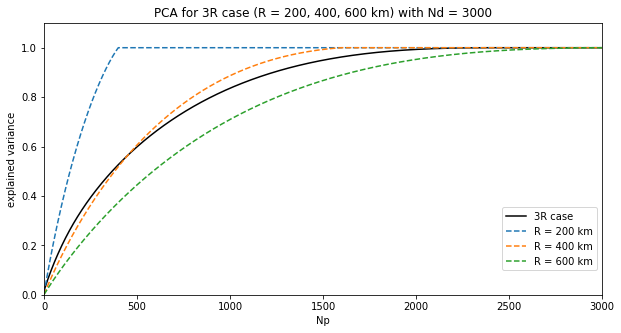

In [6]:
#number of data
Nd = 1000
#the number of principal components
Np = 1200
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
plt.xlim(0,3000)
plt.ylim(0,1.1)
#plot multiple 3R case
X_train = data_production(0,Nd)
cumulative_eigenvalue(X_train,Nd,'k','3R case')
#plot single R case
R=[200,400,600]

#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km], 3:200 km, 4: 400 km, 5:600 km}
for i in range(0,3):
    X_train = data_production(i+3,Nd*3)
    cumulative_eigenvalue(X_train,Nd,'--','R = %d km'%R[i])
    
plt.title('PCA for 3R case (R = 200, 400, 600 km) with Nd = 3000')
ax.legend(bbox_to_anchor=(1.0, 0.2))
plt.xlabel('Np')
plt.ylabel('explained variance')

# Fig. 4c

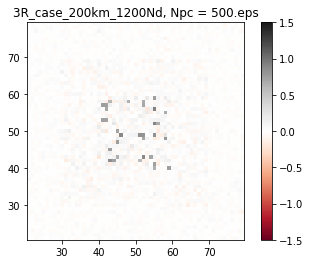

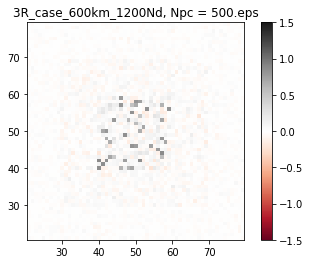

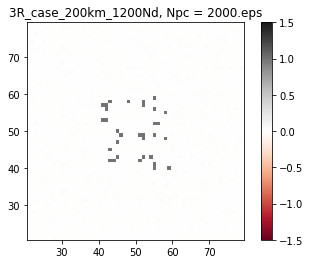

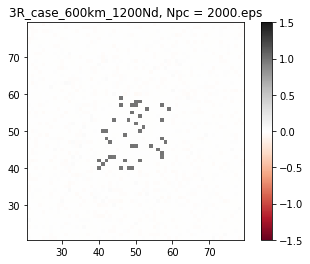

In [10]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km], 3:200 km, 4: 400 km, 5:600 km}
class_number = 0 
#number of data
data_number = 1000
#the number of principal components
Np = [500,2000]

X_train = data_production(class_number,data_number)
X_test = data_production(class_number,data_number)
    
for j in range(0,len(Np)):
    pca = PCA(n_components=Np[j],svd_solver='auto', whiten=True).fit(X_train)
    X_test_pca = pca.transform(X_test)
    X_recon = pca.inverse_transform(X_test_pca)
    
    #show_image(X_recon,0,'RdGy','on')
    image_adjust(X_recon,0,'RdGy',20,80)
    plt.title('3R_case_200km_1200Nd, Npc = %d.eps' %Np[j])
    plt.savefig('3R_case_200km_1200Nd, Npc = %d.eps' %Np[j],dpi = 500, Transparent = False)
    image_adjust(X_recon,100,'RdGy',20,80)
    #show_image(X_recon,100.,'RdGy','on')
    plt.title('3R_case_600km_1200Nd, Npc = %d.eps' %Np[j])
    plt.savefig('3R_case_600km_1200Nd, Npc = %d.eps' %Np[j],dpi = 500, Transparent = False)
    #plt.savefig('R = 340 km, fault = %d, Npc = %d.eps' %(i,Np[j]))

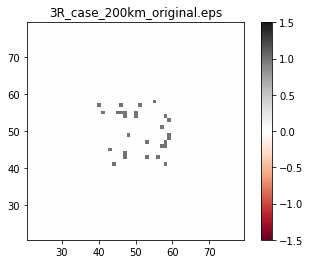

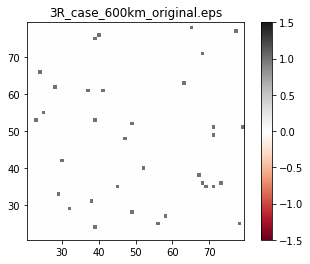

In [12]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km], 3:200 km, 4: 400 km, 5:600 km}
class_number = 0 
#number of data
data_number = 1000
#the number of principal components
Np = [1000,1500]

"""X_train = data_production(class_number,data_number)
X_test = data_production(class_number,data_number)"""

image_adjust(X_test,0,'RdGy',20,80)
plt.title('3R_case_200km_original.eps')
plt.savefig('3R_case_200km_original.eps' ,dpi = 500, Transparent = False)
image_adjust(X_test,2500,'RdGy',20,80)
plt.title('3R_case_600km_original.eps' )
plt.savefig('3R_case_600km_original.eps' ,dpi = 500, Transparent = False)
    
